In [1]:
import os

In [2]:
os.getcwd()

os.chdir('/hpcnfs/techunits/imaging/work/ATTEND/achiodin/image_registration/current')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import cv2
import tifffile as tiff
import os
import matplotlib.pyplot as plt

from pymicro.view.vol_utils import compute_affine_transform
from skimage.io import imread
from utils.visualization import plot_images_row 
from utils.make_paths import match_pattern_str_list
from utils.make_paths import make_paths_from_matches 
from utils.visualization import create_stereo_image
from utils.registration import affine_registration_cv2
from utils.registration import diffeomorphic_registration_cv2
from utils.load_registration_images import load_registration_images

In [4]:
imgs_dir_test = '/hpcnfs/techunits/imaging/work/ATTEND/crops_Zhan_images_DAPI'
# img_dir_ground_truth = '/hpcnfs/techunits/imaging/work/ATTEND/crop_Zhan_registered'

crop_sizes = [1024, 2048, 4096]

reference_image_idx = 0
moving_image_idx = 1
crop_size = crop_sizes[0]

reference_image, moving_image = load_registration_images(imgs_dir_test, reference_image_idx, moving_image_idx, crop_size)

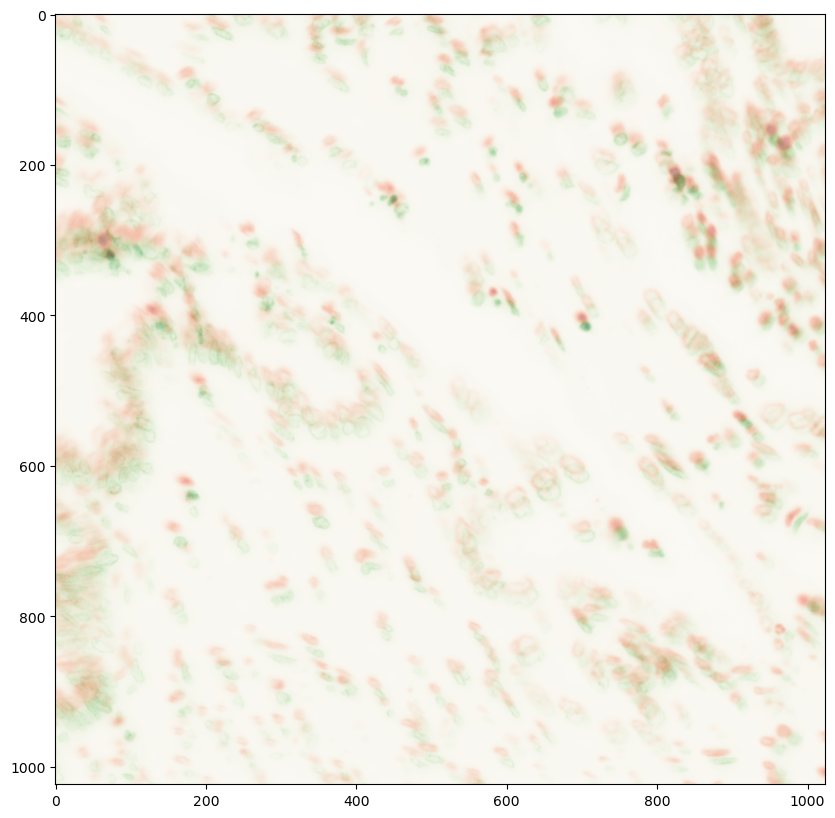

In [6]:
# Display the images
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.imshow(reference_image, cmap='Greens', alpha=0.8)
ax.imshow(moving_image, cmap='Reds', alpha=0.4)

In [ ]:
import cv2
import numpy as np
import scipy

from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import CCMetric
from dipy.align.transforms import AffineTransform2D
from dipy.align.imaffine import AffineRegistration
from skimage import io, transform
from skimage.registration import optical_flow_tvl1
from scipy.ndimage import map_coordinates

def diffeomorphic_registration_cv2(reference_image, moving_image, mode='edge'):
    # Normalize images to 8-bit (0-255) for feature detection
    reference_image_normalized = cv2.normalize(reference_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    moving_image_normalized = cv2.normalize(moving_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Check if images are loaded correctly
    # if reference_image is None or moving_image is None:
    #     raise ValueError("One or both images could not be loaded. Please check the file paths.")

    # Compute the optical flow
    v, u = optical_flow_tvl1(reference_image_normalized, moving_image_normalized)

    # Create a mesh grid
    rows, cols = moving_image.shape[:2]
    col_coords, row_coords = np.meshgrid(np.arange(cols), np.arange(rows), indexing='ij')

    # Apply the transformation
    transformed_image = map_coordinates(moving_image_normalized, [row_coords + v, col_coords + u], order=1)

    # Apply the flow to warp the moving image
    # warp_coords = np.array([row_coords + v, col_coords + u])
    # transformed_image = transform.warp(moving_image, warp_coords, mode=mode)

    return transformed_image


In [11]:
# Example usage:
transformed_image = diffeomorphic_registration_cv2(reference_image, moving_image)

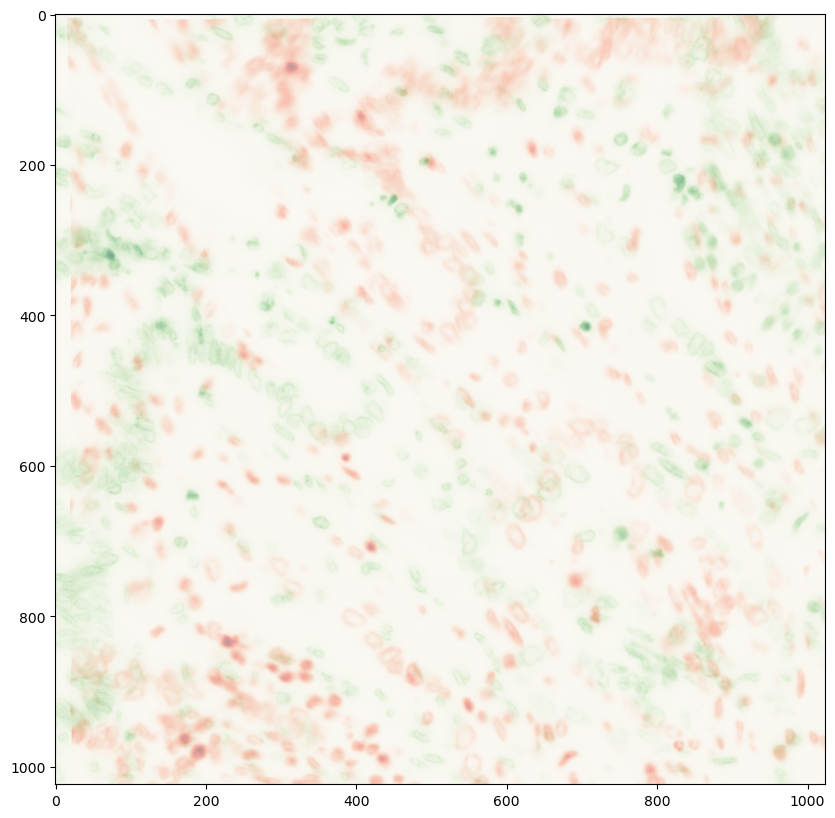

In [12]:
# reference_image_normalized = cv2.normalize(reference_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the images
fig, ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(reference_image, cmap='Greens', alpha=0.8)
ax.imshow(transformed_image, cmap='Reds', alpha=0.4)